In [13]:
%pylab inline  
import os
import sys
import cv2
import numpy as np

image = cv2.imread("Image2.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # color convert because opencv uses RGB (red,green,blue) to order colors to screen
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #is this because it requires grayscale?




Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


# kps: 1524, descriptors: (1524, 128)


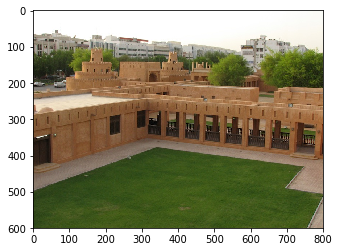

In [14]:
#SIFT
sift = cv2.xfeatures2d.SIFT_create()
(kps, descs) = sift.detectAndCompute(gray, None)
print("# kps: {}, descriptors: {}".format(len(kps), descs.shape))
imshow(image)

In [17]:
cv2.drawKeypoints(image, keyPoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
imshow(image)


NameError: name 'keyPoints' is not defined

In [26]:
confidence_list = arange(1,11)*10

In [27]:
print(confidence_list)

[ 10  20  30  40  50  60  70  80  90 100]


In [28]:
mycols = range(5,128+5)
print(mycols)

range(5, 133)


In [29]:
%pylab inline
import os

# Perform KNNmatch algorithm on data
def KNNmatch(data1, data2, k, confidence_list, return_sum):
    score = zeros((len(data1)))
    match = zeros((len(data2), len(confidence_list)))
    for i in arange(len(data2)):
        for j in arange(len(data1)):
            score[j] = sum(square(data1[j,:] - data2[i,:]))
        imin0 = argmin(score)
        min0 = score[imin0]
        score[imin0] = nan
        min1 = nanmin(score)
        for n in arange(len(confidence_list)):
            if min0 < float(confidence_list[n]) / 100 * min1:
                match[i,n] = 1
    if return_sum:
        return sum(match, axis = 0)
    return match

    
# Load in the keypoint files and run the KNNmatch
# Funcion on each target
# Compare each target to the scene over
# multiple confidence values
k = 2
confidence_list = arange(1,11) * 10
mycols = range(5,128+5)
path = "/home/user25/HW6Keys"
fileList = ["Book.key", "Box.key", "Basmati.key", "Scene.key"]

storage = dict()
for name in fileList:
    file = os.path.join(path, name)
    storage[name] = loadtxt(fname=file, delimiter=",", skiprows=1,usecols=mycols)

book_match = KNNmatch(storage[fileList[0]], storage[fileList[3]], k, confidence_list,1)
box_match = KNNmatch(storage[fileList[1]], storage[fileList[3]], k, confidence_list, 1)
basmati_match = KNNmatch(storage[fileList[2]], storage[fileList[3]], k, confidence_list, 1)



Populating the interactive namespace from numpy and matplotlib


/usr/local/lib/python3.5/dist-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['gray']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


OSError: /home/user25/HW6Keys/Book.key not found.

In [34]:
    score = zeros((5,5))
    print (score)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


In [35]:
thresh = 100 - confidence_list

In [36]:
print(thresh)

[90 80 70 60 50 40 30 20 10  0]
